In [1]:
import os
from sktime.datasets import load_from_ucr_tsv_to_dataframe
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import RobustScaler
from sktime.transformations.series.filter import Filter
from utils import *

In [2]:
dataset='Car'
X_train, y_train = load_from_ucr_tsv_to_dataframe(
os.path.join('UCRArchive_2018/', f"{dataset}/{dataset}_TRAIN.tsv")
)

scaler = TabularToSeriesAdaptor(RobustScaler())

X_train = scaler.fit_transform(X_train)

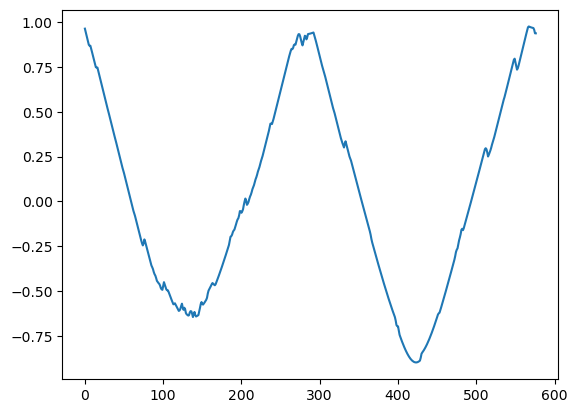

In [3]:
plt.plot(list(X_train.iloc[0, 0]))

#t = transformation_factory('Resample;1.2')
#h = t(X_train)
#plt.plot(list(h.iloc[0, 0]))

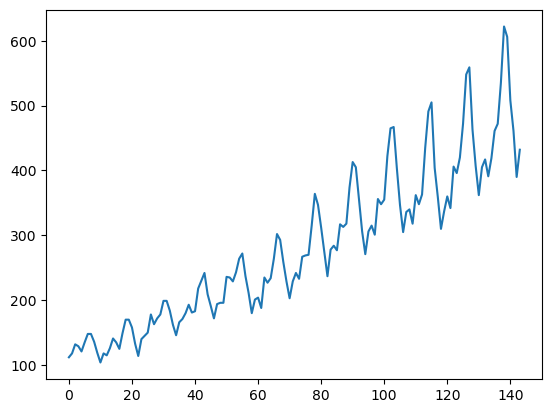

In [4]:
from sktime.transformations.series.fourier import FourierTransform
from sktime.datasets import load_airline
X = load_airline()
transformer = FourierTransform()
plt.plot(list(X))
X_ft = transformer.fit_transform(X)

In [5]:
#transformer.inverse_transform(X_ft)

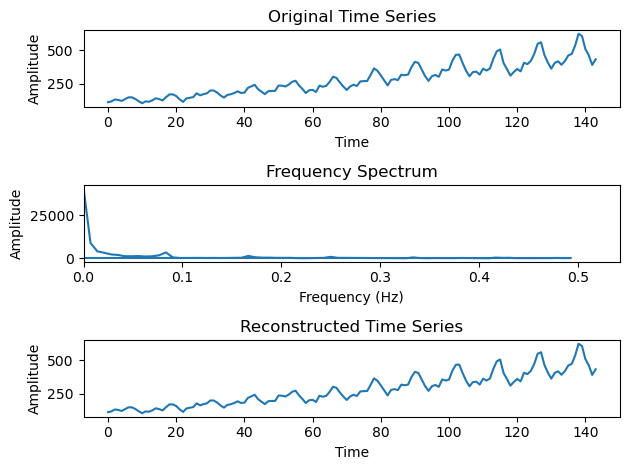

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a simple time series composed of two sinusoids
#fs = 1000  # Sampling rate in Hz
#T = 1/fs  # Sampling interval
#t = np.arange(0,1,T)  # Time vector

#f1 = 5   # Frequency of the first sinusoid in Hz
#f2 = 50  # Frequency of the second sinusoid in Hz

#y = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

y = list(X)
t = list(range(len(y)))

plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 2. Apply FFT
yf = np.fft.fft(y)

xf = np.fft.fftfreq(n=len(y))  # Frequency bins

plt.subplot(3, 1, 2)
plt.plot(xf, np.abs(yf))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, None])  # Display only the positive frequencies

# 3. Apply IFFT
y_reconstructed = np.fft.ifft(yf).real

plt.subplot(3, 1, 3)
plt.plot(t, y_reconstructed)
plt.title('Reconstructed Time Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

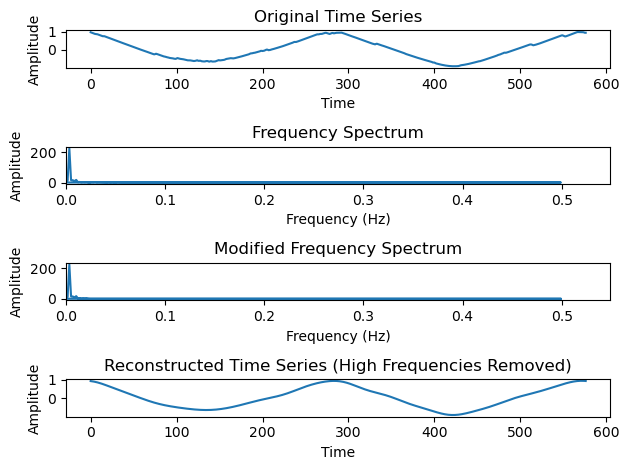

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a simple time series composed of two sinusoids
#fs = 1000  # Sampling rate in Hz
#T = 1/fs  # Sampling interval
#t = np.arange(0,1,T)  # Time vector
#
#f1 = 5   # Frequency of the first sinusoid in Hz
#f2 = 50  # Frequency of the second sinusoid in Hz

y = list(X_train.iloc[0, 0])
t = list(range(len(y)))


plt.subplot(4, 1, 1)
plt.plot(t, y)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 2. Apply FFT
yf = np.fft.fft(y)
xf = np.fft.fftfreq(n=len(y))  # Frequency bins

plt.subplot(4, 1, 2)
plt.plot(xf, np.abs(yf))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, None])  # Display only the positive frequencies

# 3. Set highest frequencies to zero (for example, everything above 20Hz)
#threshold_freq = 0.04
#yf[np.abs(xf) > threshold_freq] = 0

threshold_index = int(0.05 * len(y) / 2)  # We find the 70% mark since we're removing the top 30%
yf[threshold_index:-threshold_index] = 0

plt.subplot(4, 1, 3)
plt.plot(xf, np.abs(yf))
plt.title('Modified Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, None])

# 4. Apply IFFT
y_reconstructed = np.fft.ifft(yf).real

plt.subplot(4, 1, 4)
plt.plot(t, y_reconstructed)
plt.title('Reconstructed Time Series (High Frequencies Removed)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()